In [1]:
# See last trial for latest results and optimization notes.
# Need 93% accuracy

# Setting up Fashion_MNST
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.utils import to_categorical
import time

# For examining results
from sklearn.metrics import confusion_matrix
import seaborn as sn

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

Using TensorFlow backend.
C:\Users\nick\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nick\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nick\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nick\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

4423680/4422102 [==============================] - 2s 0us/step


In [2]:
conv_training_data = training_images.reshape(60000, 28, 28, 1)
conv_test_data = test_images.reshape(10000, 28, 28, 1)

In [3]:
def plot_training_history(history, model, eval_images=False):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    # plt.plot(history.history['acc'])
    # plt.plot(history.history['val_acc']) val_accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    if eval_images:
        loss, accuracy  = model.evaluate(conv_test_data, test_labels, verbose=False)
    else:
        loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
        
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [4]:
# Best CNN model reached 0.905 w/ 30 sec run time.
# used best model w/ 3rd CNN filter, didnt work.
# Tried more epochs didnt work.
# stride instead of maxpool didnt work.
###test all optimizers and loss next.
#####then, optimize ANN head.
#######finally, data augmentation

#Trying optimizer optimization (need to copy old code)
####Get naming framework from n_n_v6_req (runcodecalls variables)

def CNN_BaseModel_Optimizer():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #model.add(Conv2D(64, kernel_size=(3, 3), strides=(2,2), activation='relu', padding='same'))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(126, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    
    #note that the class 'model' changes with each cell.
    return model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/6
54000/54000 [==============================] - 37s 686us/step - loss: 0.8492 - accuracy: 0.8001 - val_loss: 0.3240 - val_accuracy: 0.8813
Epoch 2/6
54000/54000 [==============================] - 37s 679us/step - loss: 0.3413 - accuracy: 0.8817 - val_loss: 0.3110 - val_accuracy: 0.8855
Epoch 3/6
54000/54000 [==============================] - 36s 673us/step - loss: 0.2998 - accuracy: 0.8936 - val_loss: 0.2800 - val_accuracy: 0.8980
Epoch 4/6
54000/54000 [==============================] - 36s 666us/step - loss: 0.2689 - accuracy: 0.9041 - val_loss: 0.3047 - val_accuracy: 0.8918
Epoch 5/6
54000/54000 [==============================] - 36s 662us/step - loss: 0.2544 - accuracy: 0.9083 - val_loss: 0.2878 - val_accuracy: 0.8977
Epoch 6/6
54000/54000 [==============================] - 36s 673us/step - loss: 0.2401 - ac

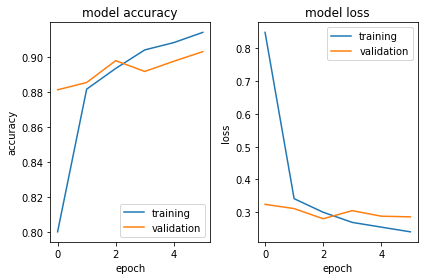

Test loss: 0.288
Test accuracy: 0.901


In [5]:
#note - verify loss function categorical cross entropy vs others.

model = CNN_BaseModel_Optimizer()
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=6, verbose=True, validation_split=.1)
plot_training_history(history, model, eval_images=True)

In [ ]:
###find the shape of the array, then proceed with image augmentation:
# >>> x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
# >>> type(x)
# <type 'numpy.ndarray'>
# >>> x.shape
# (2, 3)
# >>> x.dtype
# dtype('int32')

In [ ]:
optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
histories = []

for optimizer in optimizers:
    model = CNN_BaseModel_Optimizer()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=False, validation_split=.1)
    plot_training_history(history, model, eval_images=True)